<a href="https://colab.research.google.com/github/geoUFSC/geostats/blob/main/IDW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDW - **I**nverse **D**istance **W**eighting



 That's an interpolation technique, that has some reazoning close to geostatistics.



 ###TODO include theory

 ## Creating a function to interpolate using inverse distance weighting



In [1]:
# Creating a function to interpolate using inverse distance weighting
import numpy as np
def idw_interpolation(x, y, z, xi, yi, p=2):
    """
    Perform Inverse Distance Weighting (IDW) interpolation.
    Parameters:
    x, y, z: array-like
        x-coordinates of the known data points.
        y-coordinates of the known data points.
        z-coordinates (values) of the known data points.
    xi, yi: array-like
        xi-coordinates of the points where interpolation is to be performed.
        yi-coordinates of the points where interpolation is to be performed.
    p : float
        Power parameter that controls the weight of the distance.   Default is 2.

    Returns:
    zi : array-like
        Interpolated values at the points (xi, yi).
    """

    # Convert inputs to numpy arrays for easier manipulation
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    xi = np.array(xi)
    yi = np.array(yi)

    # Initialize the output array
    zi = np.zeros_like(xi, dtype=float)

    # Loop over each point in the grid where we want to interpolate
    for i in range(len(xi)):
        # Calculate the distance from the interpolation point to all known points
        distances = np.sqrt((x - xi[i])**2 + (y - yi[i])**2)

        # Avoid division by zero by setting a minimum distance
        distances[distances == 0] = 1e-10

        # Calculate weights using inverse distance raised to the power p
        weights = 1 / (distances ** p)

        # Compute the interpolated value as a weighted average
        zi[i] = np.sum(weights * z) / np.sum(weights)

    return zi


In [2]:
# Example 1: Interpolating at specific points

# Known data points
x=[410, -475, -350, 705, 575, 230, -500]
y=[553, 923, -522, -87, -1027, -1802, -2002]
z=[83, 72.5, 72.2, 79.6, 63.2, 83.1, 72.1] # e.g., mm of rainfall
exponent_p=2  # Power parameter

# Points where we want to interpolate
xi = [210, 50, 410]
yi = [-455, -1500, 553]

# Perform IDW interpolation
zi = idw_interpolation(x, y, z, xi, yi, p=exponent_p)

print("Interpolated values:", zi)


Interpolated values: [73.7894692  77.75753883 83.        ]


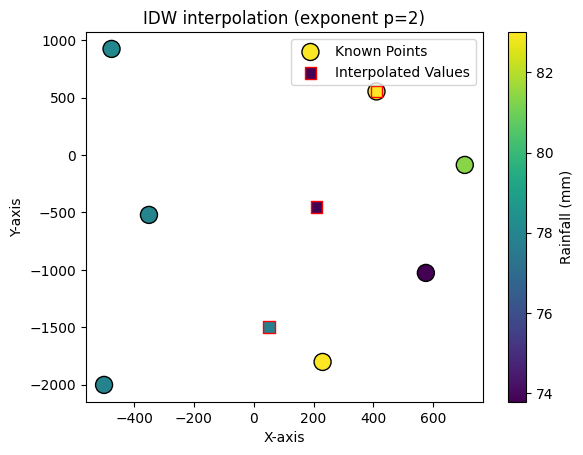

In [3]:
# Example 1: Showing the points and the interpolated values
import matplotlib.pyplot as plt
plt.scatter(x, y, c=z, cmap='viridis', edgecolor='black', label='Known Points', s=150)
plt.scatter(xi, yi, c=zi, cmap='viridis', edgecolor='red', label='Interpolated Values', s=70, marker='s')
plt.colorbar(label='Rainfall (mm)')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'IDW interpolation (exponent p={exponent_p})')
plt.show()



/tmp/ipython-input-1918242043.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xi, yi, c='none', cmap='viridis', edgecolor='red', label='Interpolated Values', s=70, marker='s')


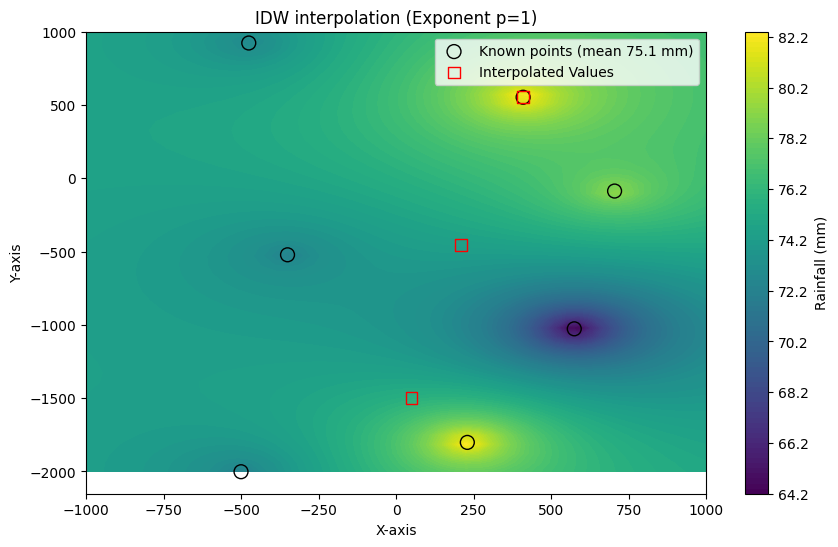

In [4]:
# Example 2: Interpolating in a grid of points

# known data points
x=[410, -475, -350, 705, 575, 230, -500]
y=[553, 923, -522, -87, -1027, -1802, -2002]
z=[83, 72.5, 72.2, 79.6, 63.2, 83.1, 72.1] # e.g., mm of rainfall
exponent_p=1  # Power parameter

# grid of points for interpolation
grid_x, grid_y = np.meshgrid(np.linspace(-1000, 1000, 50), np.linspace(-2000, 1000, 50))
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()
grid_z_flat = idw_interpolation(x, y, z, grid_x_flat, grid_y_flat, p=exponent_p)
grid_z = grid_z_flat.reshape(grid_x.shape)

# Show the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
plt.colorbar(label='Rainfall (mm)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'IDW interpolation (Exponent p={1})')
plt.scatter(x, y, c='none', edgecolor='black', label=f'Known points (mean {np.mean(z):.1f} mm)', s=100)
plt.scatter(xi, yi, c='none', cmap='viridis', edgecolor='red', label='Interpolated Values', s=70, marker='s')
plt.legend()
plt.show()


 ## Checking the behavior of weights given the distance for different exponents

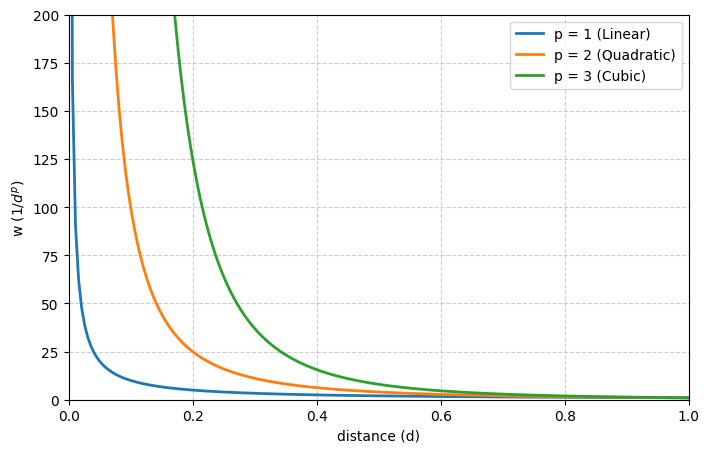

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Distances
d = np.linspace(0.001, 1, 200)  # avoid division by zero

# Exponents
p_values = [1, 2, 3]
labels = [r"p = 1 (Linear)", r"p = 2 (Quadratic)", r"p = 3 (Cubic)"]

plt.figure(figsize=(8,5))

for p, label in zip(p_values, labels):
    w = 1 / (d ** p)
    plt.plot(d, w, label=label, linewidth=2)

plt.xlabel("distance (d)")
plt.ylabel("w ($1/d^p$)")
plt.title("")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlim(0, 1)
plt.ylim(0, 200)
plt.show()


interactive(children=(FloatSlider(value=1.0, description='Exponent p', max=7.0, min=0.1), Output()), _dom_clas…

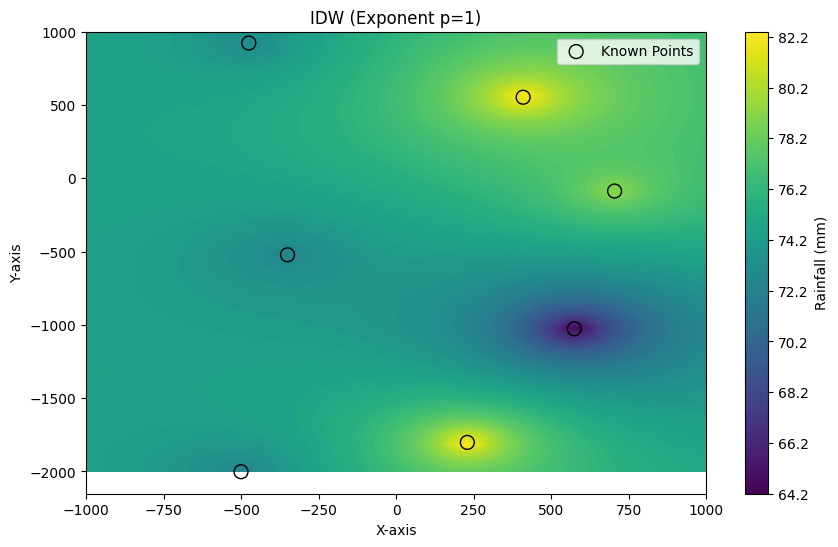

In [6]:
import ipywidgets as widgets
from ipywidgets import interact

# Example: interpolating in a grid of points

# known data points
x=[410, -475, -350, 705, 575, 230, -500]
y=[553, 923, -522, -87, -1027, -1802, -2002]
z=[83, 72.5, 72.2, 79.6, 63.2, 83.1, 72.1] # e.g., mm of rainfall

# grid of points for interpolation
grid_x, grid_y = np.meshgrid(np.linspace(-1000, 1000, 50), np.linspace(-2000, 1000, 50))
grid_x_flat = grid_x.flatten()
grid_y_flat = grid_y.flatten()

def plot_idw_grid(p):
    grid_z_flat = idw_interpolation(x, y, z, grid_x_flat, grid_y_flat, p=p)
    grid_z = grid_z_flat.reshape(grid_x.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    plt.colorbar(label='Rainfall (mm)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'IDW (Exponent p={p:.1f})')
    plt.scatter(x, y, c='none', edgecolor='black', label='Known Points', s=100)
    plt.legend()
    plt.show()

interact(plot_idw_grid, p=widgets.FloatSlider(value=1, min=0.1, max=7, step=0.1, description='Exponent p'))

# Show the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
plt.colorbar(label='Rainfall (mm)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'IDW (Exponent p={1})')
plt.scatter(x, y, c='none', edgecolor='black', label='Known Points', s=100)
plt.legend()



## Updated IDW function to set a radius, a k-nearest limit, either, or both


In [7]:
import numpy as np

def idw_predict(
    x0,
    points,
    values,
    p=2.0,
    radius=None,
    k=None
):
    """
    Inverse Distance Weighting (IDW) predictor with optional radius filter and
    k-nearest neighbor limit.
    """
    x0 = np.asarray(x0, dtype=float)
    P = np.asarray(points, dtype=float)
    v = np.asarray(values, dtype=float)
    if P.ndim != 2:
        raise ValueError("`points` must be a 2D array of shape (N, D).")
    if v.ndim != 1 or v.shape[0] != P.shape[0]:
        raise ValueError("`values` must be a 1D array with same length as `points`.")
    if x0.shape[0] != P.shape[1]:
        raise ValueError("`x0` must have the same dimensionality as `points`.")
    if k is not None and (not isinstance(k, (int, np.integer)) or k <= 0):
        raise ValueError("`k` must be a positive integer.")
    if radius is not None and radius <= 0:
        raise ValueError("`radius` must be positive.")

    d = np.linalg.norm(P - x0, axis=1)

    zero_mask = (d == 0)
    if np.any(zero_mask):
        return v[zero_mask][0]

    candidate_idx = np.arange(P.shape[0])
    if radius is not None:
        in_rad = d <= radius
        candidate_idx = candidate_idx[in_rad]
        d = d[in_rad]
        v = v[in_rad]
        if d.size == 0:
            return np.nan

    if k is not None and d.size > k:
        knn_idx = np.argpartition(d, k)[:k]
        d = d[knn_idx]
        v = v[knn_idx]

    w = 1.0 / np.power(d, p)
    return np.dot(w, v) / w.sum()






In [8]:
x = np.array([410, -475, -350, 705, 575, 230, -500])
y = np.array([553, 923, -522, -87, -1027, -1802, -2002])
z = np.array([83, 72.5, 72.2, 79.6, 63.2, 83.1, 72.1])

points = np.column_stack([x, y])
values = z

# Example queries
x0 = np.array([0.0, 0.0])

results = {
    "all_points": idw_predict(x0, points, values, p=2, radius=None, k=None),
    "radius_1200": idw_predict(x0, points, values, p=2, radius=1200.0, k=None),
    "k_3": idw_predict(x0, points, values, p=2, radius=None, k=3),
    "radius_1200_k_3": idw_predict(x0, points, values, p=2, radius=1200.0, k=3),
}

results


{'all_points': np.float64(76.11717639665991),
 'radius_1200': np.float64(75.97545919401081),
 'k_3': np.float64(77.85465349036178),
 'radius_1200_k_3': np.float64(77.85465349036178)}